<a href="https://colab.research.google.com/github/Suriyakrishnansuriya/Cars_Model_Prediction/blob/main/Cars_class_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **import the necessory modules**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.feature_selection import VarianceThreshold

In [2]:
# read the dataset 
data= pd.read_csv('cars_class.csv')

# **Exploaray data analysis**

In [3]:
data.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [4]:
# check how many unique values is present in tha dataset
print('unique_values :',data['Class'].unique())

print('number of unique_values :',data['Class'].nunique())

unique_values : [0 3 1 2]
number of unique_values : 4


In [5]:
# check whether null values in the data
data.isnull().sum()

ID              0
Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [6]:
# check whether duplicates in the data
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [8]:
data.columns

Index(['ID', 'Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra',
       'Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis',
       'Sc.Var.maxis', 'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis',
       'Kurt.Maxis', 'Holl.Ra', 'Class'],
      dtype='object')

In [9]:
# row and columns
data.shape

(719, 20)

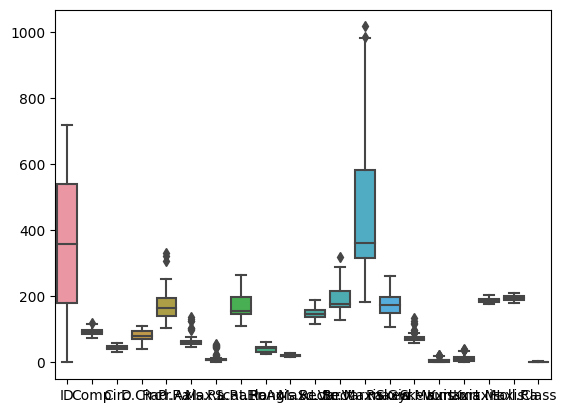

In [10]:
sns.boxplot(data)
plt.show()

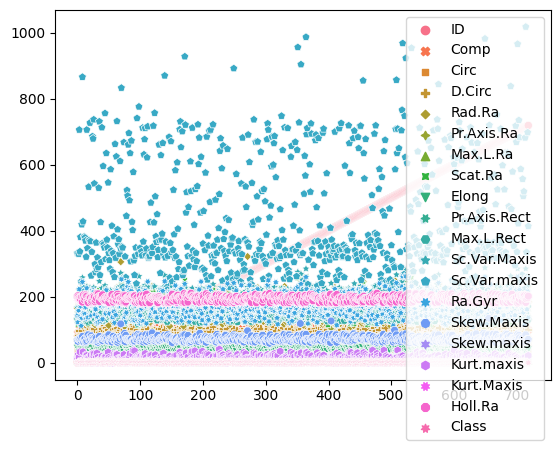

In [11]:
sns.scatterplot(data)
plt.show()

# **Remove the outliers in the data**

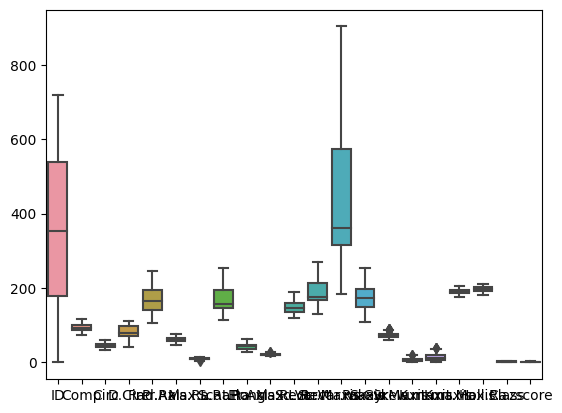

In [12]:
# add a columns 'zscore' in data
# remove outliers in the data using Zscore (-3 to 3) & some outliers are removed based on the Zscore

for col in data.columns:
  # data_od= data[(data[col]>=data[col].quantile(0.25))&(data[col]<=data[col].quantile(0.75))]
  data['zscore']= stats.zscore(data[col])
  data= data[(data['zscore']>=-3)&(data['zscore']<=3)]
sns.boxplot(data)
plt.show()

In [13]:
data.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,...,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class,zscore
0,1,88,39,70,166,66,7,148,44,19,...,167,332,143,69,5,13,193,201,0,-1.323872
1,2,85,35,64,129,57,6,116,57,17,...,138,200,123,65,1,23,196,203,3,1.361438
2,3,91,41,84,141,57,9,149,45,19,...,170,330,158,72,9,14,189,199,3,1.361438
3,4,102,54,98,177,56,10,219,31,25,...,219,706,223,72,5,17,186,196,1,-0.428769
4,5,87,39,74,152,58,6,151,44,19,...,174,337,140,70,1,33,187,196,2,0.466335


In [14]:
data.shape


(691, 21)

# **Data cleaning & Preprocessing the data**

In [15]:
# drop ID columns beacause of this consist variance 1  but this columns is not needed
data.drop(['ID','zscore' ], axis=1, inplace=True)

In [16]:
# split the data into X and y 
X= data.iloc[:,0:-1]
y= data.iloc[:, -1]

In [17]:
y.shape

(691,)

In [18]:
# using Variance Threshold to check how much variance in features
vt= VarianceThreshold(threshold=0.5)
X_high_variance= vt.fit_transform(X)
X_high_variance

array([[ 88,  39,  70, ...,  13, 193, 201],
       [ 85,  35,  64, ...,  23, 196, 203],
       [ 91,  41,  84, ...,  14, 189, 199],
       ...,
       [ 90,  42,  63, ...,   3, 197, 204],
       [101,  56, 101, ...,   6, 187, 197],
       [ 99,  38,  74, ...,  22, 200, 202]])

In [19]:
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [20]:
#apply StandardScaler to fit the data
ss= StandardScaler()
standard= ss.fit_transform(X)
standard

array([[-0.66479595, -0.9355132 , -0.74101045, ...,  0.08368926,
         0.67459061,  0.76468537],
       [-1.04728887, -1.59531378, -1.13222773, ...,  1.24027484,
         1.17048648,  1.04500239],
       [-0.28230303, -0.60561291,  0.17182988, ...,  0.19934782,
         0.01339613,  0.48436835],
       ...,
       [-0.40980067, -0.44066276, -1.19743061, ..., -1.07289632,
         1.3357851 ,  1.18516091],
       [ 0.99267339,  1.86863927,  1.28027884, ..., -0.72592065,
        -0.31720112,  0.20405132],
       [ 0.7376781 , -1.10046334, -0.48019893, ...,  1.12461628,
         1.83168096,  0.90484388]])

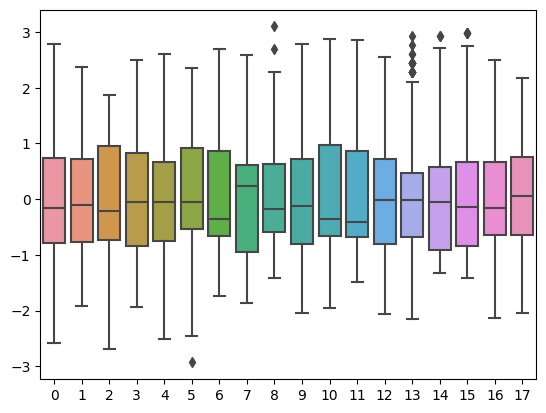

In [21]:
# to plot the boxplot to check the outliers in the data
# still some outliers are there after standardscaler
sns.boxplot(standard)
plt.show()

## Feature selection 

In [22]:
# apply PCA to find how much variance in all the features
pca= PCA(n_components=18)
pca_feature= pca.fit_transform(standard)
pca_feature

array([[ 1.88489484e+00, -1.79314321e+00, -4.10519081e-01, ...,
         2.22493733e-02, -2.07278723e-02,  2.91124102e-02],
       [ 4.72616361e+00, -2.59929233e+00, -1.18033463e+00, ...,
        -8.49934254e-02,  4.19355348e-02,  6.21685075e-04],
       [ 1.40724575e+00, -4.13778749e-01,  4.78951863e-01, ...,
         2.16141918e-02,  3.23198048e-02,  2.18607391e-02],
       ...,
       [ 2.49793895e+00, -2.06604658e+00,  2.48636229e+00, ...,
        -3.82716483e-02, -6.42793746e-02,  1.81209408e-02],
       [-5.18784926e+00,  5.26234112e-01, -1.08366172e-01, ...,
        -1.68567396e-01,  4.88440761e-02, -3.02085595e-02],
       [ 5.38810955e-01, -2.50573419e+00, -1.97600718e+00, ...,
        -5.26477506e-03, -6.46945352e-02,  8.82248785e-03]])

In [23]:
pca.explained_variance_

array([9.98320457e+00, 3.23902663e+00, 1.23459790e+00, 1.12361970e+00,
       8.78064467e-01, 6.22214744e-01, 3.18977457e-01, 2.47331128e-01,
       1.14871966e-01, 7.79207811e-02, 6.05315641e-02, 4.34979720e-02,
       2.69180799e-02, 2.13869619e-02, 1.51819867e-02, 1.17460071e-02,
       6.61810392e-03, 3.76942277e-04])

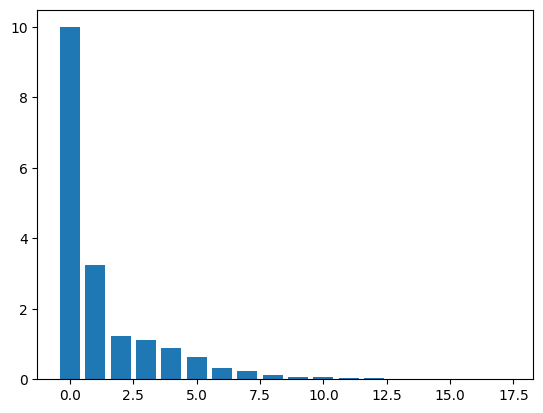

In [24]:
plt.bar(range(18), pca.explained_variance_)
plt.show()

In [25]:
pca.explained_variance_ratio_*100

array([5.53819839e+01, 1.79685510e+01, 6.84895118e+00, 6.23329790e+00,
       4.87107640e+00, 3.45174605e+00, 1.76953244e+00, 1.37207331e+00,
       6.37254033e-01, 4.32266755e-01, 3.35799801e-01, 2.41305682e-01,
       1.49328470e-01, 1.18644506e-01, 8.42223090e-02, 6.51611583e-02,
       3.67140353e-02, 2.09109319e-03])

In [26]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 55.38198388,  73.35053488,  80.19948606,  86.43278396,
        91.30386036,  94.7556064 ,  96.52513884,  97.89721216,
        98.53446619,  98.96673294,  99.30253275,  99.54383843,
        99.6931669 ,  99.8118114 ,  99.89603371,  99.96119487,
        99.99790891, 100.        ])

In [27]:
# remove the some columns from the data
X.drop(['Holl.Ra','Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis', 'Kurt.Maxis','Sc.Var.maxis', 'Sc.Var.Maxis'], axis=1, inplace=True)
X.columns

<ipython-input-27-8461d810aa73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Holl.Ra','Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis', 'Kurt.Maxis','Sc.Var.maxis', 'Sc.Var.Maxis'], axis=1, inplace=True)


Index(['Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Scat.Ra',
       'Elong', 'Pr.Axis.Rect', 'Max.L.Rect'],
      dtype='object')

In [28]:
X.shape

(691, 10)

In [29]:
y.shape

(691,)

In [30]:
y

0      0
1      3
2      3
3      1
4      2
      ..
713    1
715    2
716    3
717    2
718    0
Name: Class, Length: 691, dtype: int64

# **check the data whether is imbalance or not**

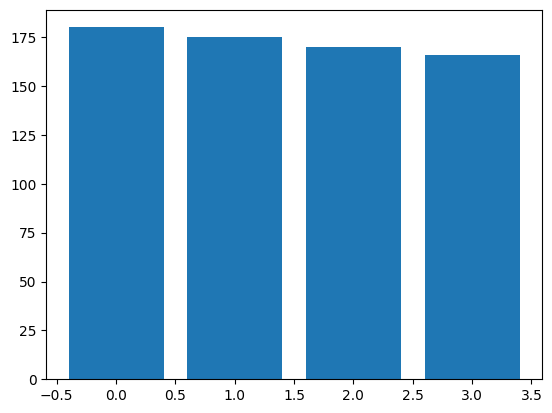

In [31]:
# bar plot , this is balanced dataset
plt.bar(range(4), y.value_counts())
plt.show()

In [32]:
# to split the data into train & test data(20%)
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2)
X_test.shape

(139, 10)

In [33]:
y_test.shape

(139,)

In [34]:
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)

[]

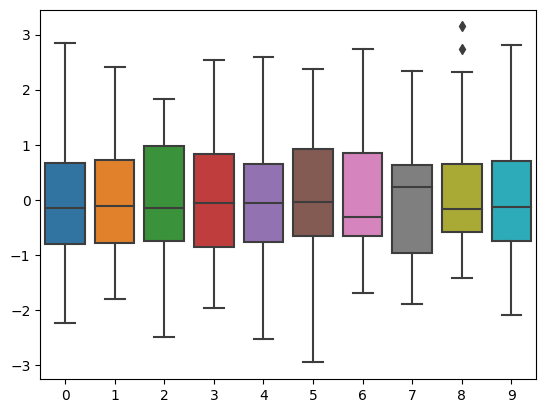

In [35]:
sns.boxplot(X_train)
plt.plot()

# **to predict the module using Classification method**

# **#Logistic Regression**

In [36]:
# LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, y_train)
lr_train_predict= lr.predict(X_train)

In [37]:
lr= LogisticRegression()
lr.fit(X_test, y_test)
lr_test_predict= lr.predict(X_test)

In [38]:
print('Logistic_Regression')
print('accuracy_score of train_data :', accuracy_score(y_train, lr_train_predict))
print('accuracy_score of test_data :', accuracy_score(y_test, lr_test_predict))


Logistic_Regression
accuracy_score of train_data : 0.7771739130434783
accuracy_score of test_data : 0.7410071942446043


In [39]:
print('confusion_matrix of train_data :\n',confusion_matrix(y_train, lr_train_predict))
print('confusion_matrix of test_data :\n',confusion_matrix(y_test, lr_test_predict))
print('---------------------------------------------------------------------')
print('f1_score for train_data :', f1_score(y_train, lr_train_predict, average='micro'))
print('f1_score for test_data :', f1_score(y_test, lr_test_predict, average='micro'))

confusion_matrix of train_data :
 [[139   3   1   1]
 [  9  92  35   6]
 [  9  51  58   5]
 [  2   1   0 140]]
confusion_matrix of test_data :
 [[28  1  1  1]
 [ 1 23 11  3]
 [ 6 11 26  0]
 [ 0  0  1 26]]
---------------------------------------------------------------------
f1_score for train_data : 0.7771739130434783
f1_score for test_data : 0.7410071942446043


---------train data---------


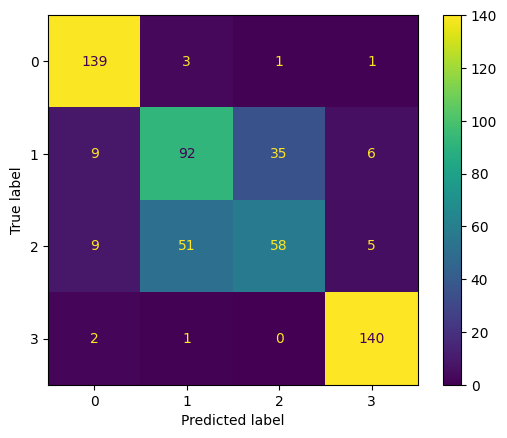

In [40]:
print('---------train data---------')
cm_train= confusion_matrix(y_train, lr_train_predict, labels=lr.classes_)
cm_test= confusion_matrix(y_test, lr_test_predict, labels=lr.classes_)
disp= ConfusionMatrixDisplay(cm_train, display_labels=lr.classes_)
disp.plot()
plt.show()

---------test data---------


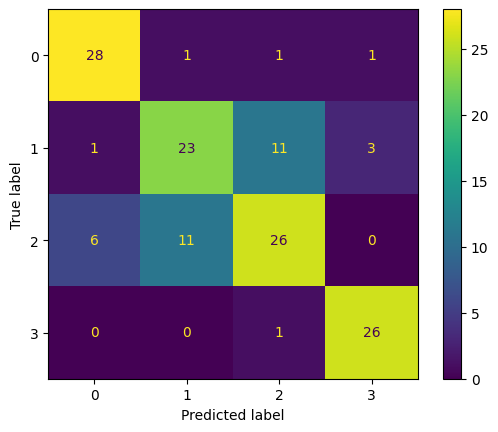

In [41]:
print('---------test data---------')
disp= ConfusionMatrixDisplay(cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

# **#RandomForest Classifier**

In [42]:
# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_train_predict= rfc.predict(X_train)

In [43]:
rfc.fit(X_test, y_test)
rfc_test_predict= rfc.predict(X_test)

In [44]:
print('RandomForest Classifier')
print('accuracy_score of train_data :', accuracy_score(y_train, rfc_train_predict))
print('accuracy_score of test_data :', accuracy_score(y_test, rfc_test_predict))

RandomForest Classifier
accuracy_score of train_data : 1.0
accuracy_score of test_data : 1.0


In [45]:
print('confusion_matrix of train_data :\n',confusion_matrix(y_train, rfc_train_predict))
print('confusion_matrix of test_data :\n',confusion_matrix(y_test, rfc_test_predict))
print('---------------------------------------------------------------------')
print('f1_score for train_data :', f1_score(y_train, rfc_train_predict, average='micro'))
print('f1_score for test_data :', f1_score(y_test, rfc_test_predict, average='micro'))

confusion_matrix of train_data :
 [[144   0   0   0]
 [  0 142   0   0]
 [  0   0 123   0]
 [  0   0   0 143]]
confusion_matrix of test_data :
 [[31  0  0  0]
 [ 0 38  0  0]
 [ 0  0 43  0]
 [ 0  0  0 27]]
---------------------------------------------------------------------
f1_score for train_data : 1.0
f1_score for test_data : 1.0


---------train data---------


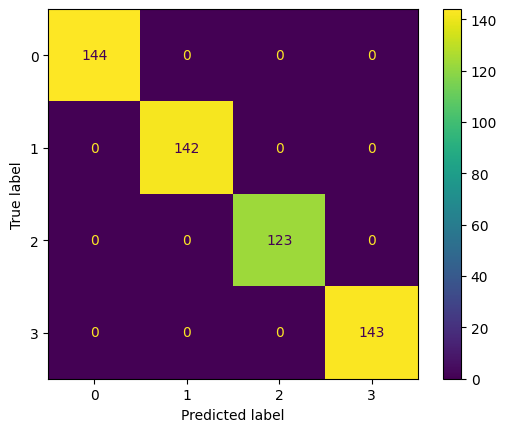

In [46]:
print('---------train data---------')
cm_train= confusion_matrix(y_train, rfc_train_predict, labels=rfc.classes_)
cm_test= confusion_matrix(y_test, rfc_test_predict, labels=rfc.classes_)
disp= ConfusionMatrixDisplay(cm_train, display_labels=rfc.classes_)
disp.plot()
plt.show()

---------test data---------


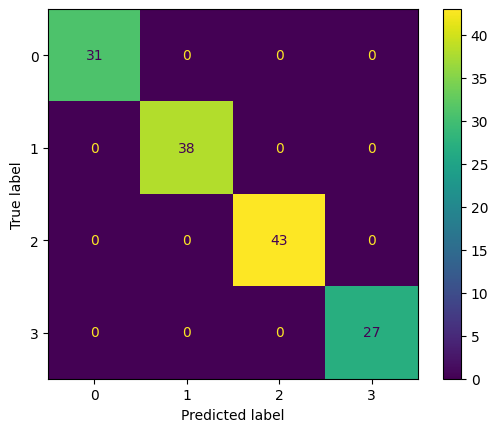

In [47]:
print('---------test data---------')
disp= ConfusionMatrixDisplay(cm_test, display_labels=rfc.classes_)
disp.plot()
plt.show()

# **#DecisionTree Classifier**

In [48]:
# DecisionTree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_train_predict= dtc.predict(X_train)

In [49]:
dtc.fit(X_test, y_test)
dtc_test_predict= dtc.predict(X_test)

In [50]:
print('DecisionTree Classifier')
print('accuracy_score of train_data :', accuracy_score(y_train, dtc_train_predict))
print('accuracy_score of test_data :', accuracy_score(y_test, dtc_test_predict))

DecisionTree Classifier
accuracy_score of train_data : 1.0
accuracy_score of test_data : 1.0


In [51]:
print('confusion_matrix of train_data :\n',confusion_matrix(y_train, dtc_train_predict))
print('confusion_matrix of test_data :\n',confusion_matrix(y_test, dtc_test_predict))
print('---------------------------------------------------------------------')
print('f1_score for train_data :', f1_score(y_train, dtc_train_predict, average='micro'))
print('f1_score for test_data :', f1_score(y_test, dtc_test_predict, average='micro'))

confusion_matrix of train_data :
 [[144   0   0   0]
 [  0 142   0   0]
 [  0   0 123   0]
 [  0   0   0 143]]
confusion_matrix of test_data :
 [[31  0  0  0]
 [ 0 38  0  0]
 [ 0  0 43  0]
 [ 0  0  0 27]]
---------------------------------------------------------------------
f1_score for train_data : 1.0
f1_score for test_data : 1.0


---------train data---------


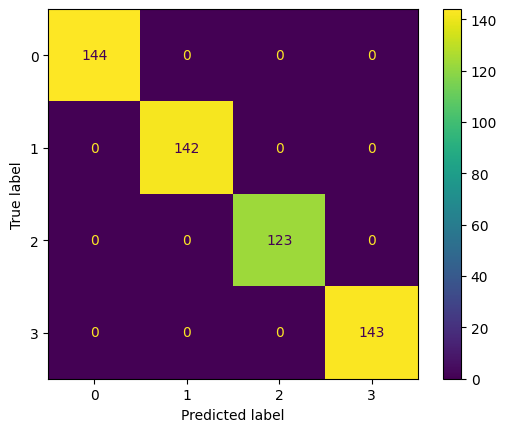

In [52]:
print('---------train data---------')
cm_train= confusion_matrix(y_train, dtc_train_predict, labels=dtc.classes_)
cm_test= confusion_matrix(y_test, dtc_test_predict, labels=dtc.classes_)
disp= ConfusionMatrixDisplay(cm_train, display_labels=dtc.classes_)
disp.plot()
plt.show()

---------test data---------


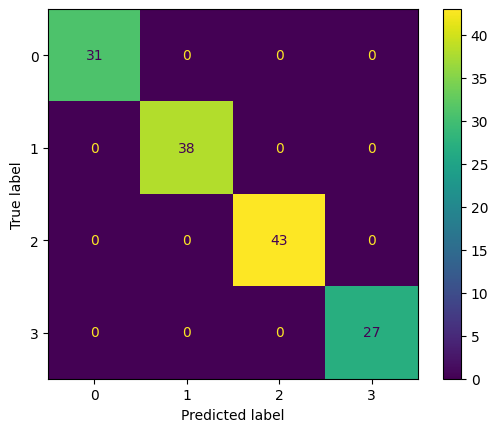

In [53]:
print('---------test data---------')
disp= ConfusionMatrixDisplay(cm_test, display_labels=dtc.classes_)
disp.plot()
plt.show()

# **#KNeighbors Classifier**

In [54]:
# KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_train_predict= knn.predict(X_train)

In [55]:
knn.fit(X_test, y_test)
knn_test_predict= knn.predict(X_test)

In [56]:
print('KNeighbors Classifier')
print('accuracy_score of train_data :', accuracy_score(y_train, knn_train_predict))
print('accuracy_score of test_data :', accuracy_score(y_test, knn_test_predict))

KNeighbors Classifier
accuracy_score of train_data : 0.8333333333333334
accuracy_score of test_data : 0.8057553956834532


In [57]:
print('confusion_matrix of train_data :\n',confusion_matrix(y_train, knn_train_predict))
print('confusion_matrix of test_data :\n',confusion_matrix(y_test, knn_test_predict))
print('---------------------------------------------------------------------')
print('f1_score for train_data :', f1_score(y_train, knn_train_predict, average='micro'))
print('f1_score for test_data :', f1_score(y_test, knn_test_predict, average='micro'))

confusion_matrix of train_data :
 [[143   1   0   0]
 [  4 101  34   3]
 [  5  36  80   2]
 [  3   3   1 136]]
confusion_matrix of test_data :
 [[31  0  0  0]
 [ 1 22 13  2]
 [ 0  8 35  0]
 [ 1  1  1 24]]
---------------------------------------------------------------------
f1_score for train_data : 0.8333333333333334
f1_score for test_data : 0.8057553956834532


---------train data---------


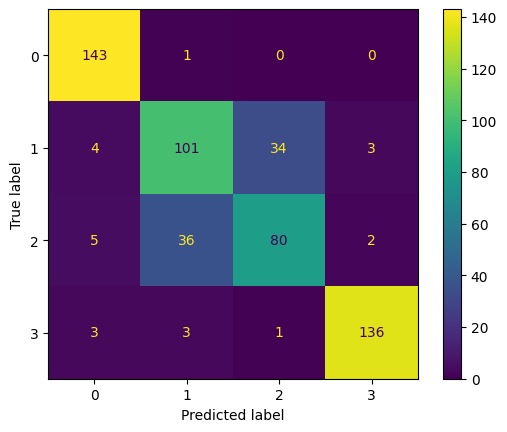

In [64]:
print('---------train data---------')
cm_train= confusion_matrix(y_train, knn_train_predict, labels=knn.classes_)
cm_test= confusion_matrix(y_test, knn_test_predict, labels=knn.classes_)
disp= ConfusionMatrixDisplay(cm_train, display_labels=knn.classes_)
disp.plot()
plt.show()

---------test data---------


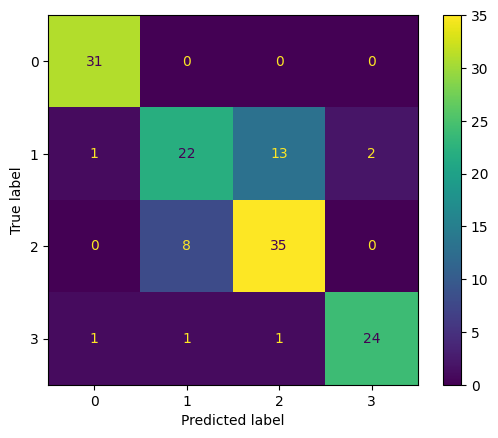

In [65]:
print('---------test data---------')
disp= ConfusionMatrixDisplay(cm_test, display_labels=knn.classes_)
disp.plot()
plt.show()

# **SVC**

In [59]:
# SVC
svc= SVC()
svc.fit(X_train, y_train)
svc_train_predict= svc.predict(X_train)

In [61]:
svc.fit(X_test, y_test)
svc_test_predict= svc.predict(X_test)

In [62]:
print('SVC')
print('accuracy_score of train_data :', accuracy_score(y_train, svc_train_predict))
print('accuracy_score of test_data :', accuracy_score(y_test, svc_test_predict))

SVC
accuracy_score of train_data : 0.8115942028985508
accuracy_score of test_data : 0.7985611510791367


In [63]:
print('confusion_matrix of train_data :\n',confusion_matrix(y_train, svc_train_predict))
print('confusion_matrix of test_data :\n',confusion_matrix(y_test, svc_test_predict))
print('---------------------------------------------------------------------')
print('f1_score for train_data :', f1_score(y_train, svc_train_predict, average='micro'))
print('f1_score for test_data :', f1_score(y_test, svc_test_predict, average='micro'))

confusion_matrix of train_data :
 [[142   1   0   1]
 [  2  98  36   6]
 [  3  48  66   6]
 [  0   1   0 142]]
confusion_matrix of test_data :
 [[31  0  0  0]
 [ 1 22 13  2]
 [ 2  6 35  0]
 [ 3  0  1 23]]
---------------------------------------------------------------------
f1_score for train_data : 0.8115942028985508
f1_score for test_data : 0.7985611510791367


---------train data---------


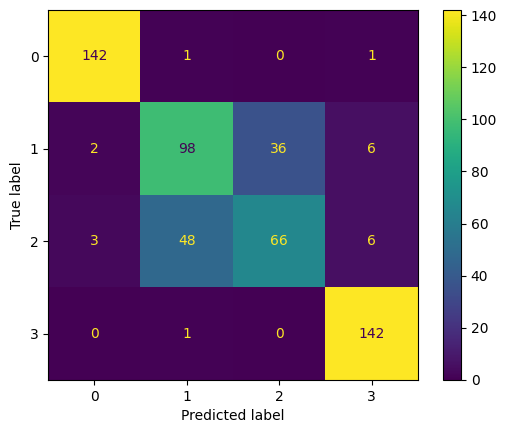

In [66]:
print('---------train data---------')
cm_train= confusion_matrix(y_train, svc_train_predict, labels=svc.classes_)
cm_test= confusion_matrix(y_test, svc_test_predict, labels=svc.classes_)
disp= ConfusionMatrixDisplay(cm_train, display_labels=svc.classes_)
disp.plot()
plt.show()

---------test data---------


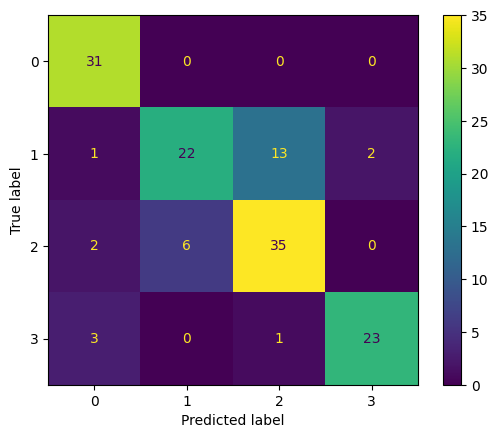

In [67]:
print('---------test data---------')
disp= ConfusionMatrixDisplay(cm_test, display_labels=svc.classes_)
disp.plot()
plt.show()

accuracy_score: 1.0
f1_score : 1.0
-------------------------------------------------------------------


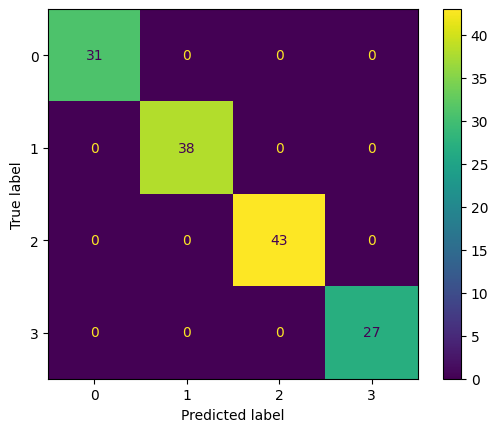

In [70]:
# RandomForest Classifier  and DecisionTree Classifier is  the best gives best outputs in train and test data
# so I choose Randomforest classifier for the final model
# Randomforest gives best accuracy score for both data(train and test)

# RandomForestClassifier
final_model = RandomForestClassifier()
final_model.fit(X_test, y_test)
final_model_test= final_model.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, final_model_test))
print('f1_score :', f1_score(y_test, final_model_test, average='micro'))
print('-------------------------------------------------------------------')

cm= confusion_matrix(y_test, final_model_test, labels=final_model.classes_)
disp= ConfusionMatrixDisplay(cm, display_labels=final_model.classes_)
disp.plot()
plt.show()